# Hospital Patient Analysis

### Introduction

In this assignment, you will perform a comprehensive analysis of
hospital patient data using three CSV files: drug_code.csv,
diagnostic_code.csv, and patient_data.csv. The goal of this analysis is
to gain insights into patient demographics, drug prescriptions,
diagnoses, and mortality rates. You will answer a series of questions
and enhance the assignment with more visualizations.
Dataset Description
drug_code.csv: Contains information about different drug codes,
including their descriptions and severity levels.
diagnostic_code.csv: Contains diagnostic codes (ICD-9 codes)
along with their descriptions and severity levels.
patient_data.csv: Contains patient information, including subject
IDs, genders, ages, drug prescriptions, and diagnostic codes.

### Importing required libraries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Datasets

In [56]:
diagnostic_data= pd.read_csv("diagnostic_code.csv")
drug_data = pd.read_csv("drug_code.csv")
patient_data = pd.read_csv("patient_data.csv")

### Quick look on diagnostic_data

In [57]:
diagnostic_data.head()

,row_id,subject_id,hadm_id,seq_num,icd9_code
0,1,13,1521,3,D66
1,2,64,1782,1,D80
2,3,17,1272,3,D81
3,4,9,1935,2,D48
4,5,41,1401,2,D48


In [58]:
diagnostic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   row_id      100 non-null    int64 
 1   subject_id  100 non-null    int64 
 2   hadm_id     100 non-null    int64 
 3   seq_num     100 non-null    int64 
 4   icd9_code   100 non-null    object
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


### Quick look on drug_data

In [59]:
drug_data.head()

,row_id,subject_id,hadm_id,drg_type,drg_code,description,drg_severity,drg_mortality
0,1,97,1669,Type A,101,Drug 1,High,Low
1,2,36,1632,Type B,134,Drug 2,Medium,Low
2,3,3,1054,Type A,181,Drug 3,Medium,Medium
3,4,73,1911,Type A,177,Drug 4,High,Low
4,5,8,1011,Type A,119,Drug 5,High,Medium


In [60]:
drug_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   row_id         50 non-null     int64 
 1   subject_id     50 non-null     int64 
 2   hadm_id        50 non-null     int64 
 3   drg_type       50 non-null     object
 4   drg_code       50 non-null     int64 
 5   description    50 non-null     object
 6   drg_severity   50 non-null     object
 7   drg_mortality  50 non-null     object
dtypes: int64(4), object(4)
memory usage: 3.2+ KB


### Quick look on patient data

In [61]:
patient_data.head()

,row_id,subject_id,gender,expire_flag
0,1,70,M,0
1,2,83,M,0
2,3,30,F,0
3,4,71,M,0
4,5,74,F,0


In [62]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   row_id       200 non-null    int64 
 1   subject_id   200 non-null    int64 
 2   gender       200 non-null    object
 3   expire_flag  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


# Question 1: Identifying High-Risk Patients.
### Identify all the patients who were prescribed drugs with a high severity level and had a high mortality rate. Return a list of subject IDs and their genders for these high-risk patients.




In [63]:
# Extracting subject IDs and genders of high-risk patients

high_risk_patients = patient_data[
    (patient_data['subject_id'].isin(drug_data[drug_data['drg_severity'] == 'High']['subject_id'])) &
    (patient_data['subject_id'].isin(drug_data[drug_data['drg_mortality'] == 'High']['subject_id']))  ]

high_risk_patient_list = high_risk_patients[['subject_id', 'gender']].values.tolist()
print(f"High Risk Patients List : \n {high_risk_patient_list}")

High Risk Patients List : 
 [[98, 'M'], [68, 'F'], [68, 'F'], [32, 'M'], [98, 'F'], [98, 'F'], [32, 'M'], [2, 'F'], [44, 'M'], [2, 'F'], [32, 'M'], [32, 'M'], [32, 'M'], [97, 'M'], [2, 'M'], [97, 'M'], [98, 'M'], [44, 'F']]


# Question 2: Gender Distribution among Expired Patients.
### Calculate the distribution of genders (male, female) among patients who have expired. Provide the percentage of male and female patients among the expired cases. Visualize this distribution using a pie chart.

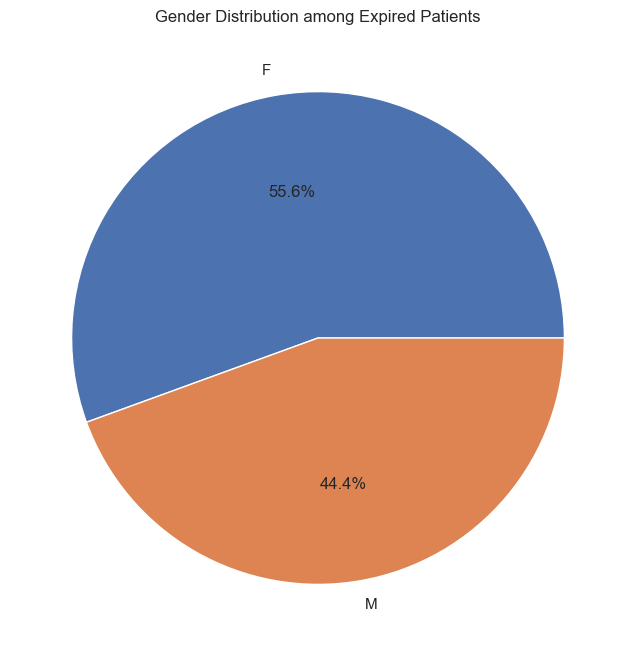

In [64]:
# Extracting subject IDs of expired patients
expired_patients = patient_data[patient_data['expire_flag'] == 1]

# Calculating gender distribution among expired patients
expired_gender_dist = expired_patients['gender'].value_counts(normalize=True)

# Setting Seaborn style
sns.set(style="whitegrid")

# Plotting the distribution using a pie chart.
plt.figure(figsize=(8, 8))
plt.pie(expired_gender_dist, labels=expired_gender_dist.index, autopct='%1.1f%%', colors=sns.color_palette())
plt.title('Gender Distribution among Expired Patients')
plt.show()

# Question 3: Common Diagnoses for High-Risk Patients
### Among the high-risk patients identified in Question 1, determine the most common ICD-9 diagnosis codes. Return the top 3 most common diagnosis codes along with their counts.

In [65]:
# Filtering high-risk patients identified in Question 1
high_risk_subjects = high_risk_patients['subject_id']

# Filtering diagnostic codes for high-risk patients
high_risk_diagnoses = diagnostic_data[diagnostic_data['subject_id'].isin(high_risk_subjects)]

# Counting the occurrences of each diagnosis code
common_diagnoses = high_risk_diagnoses['icd9_code'].value_counts()

# Getting the top 3 most common diagnosis codes
top_common_diagnoses = common_diagnoses.head(3)

print("Top 3 Most Common Diagnosis Codes for High-Risk Patients :")
print(top_common_diagnoses)

Top 3 Most Common Diagnosis Codes for High-Risk Patients :
D98    1
D30    1
D51    1
Name: icd9_code, dtype: int64


# Question 4: Mortality Rate by Diagnosis Type
### Calculate the mortality rate for each diagnosis type (ICD-9 code). Return a list of diagnosis types with their corresponding mortality rates (number of deaths divided by the number of patients with that diagnosis type). Visualize this information using a bar chart.

In [66]:
# Calculate mortality rate for each diagnosis type(ICD-9 code)
diagnosis_mortality = diagnostic_data.groupby('icd9_code')['subject_id'].count().reset_index()
diagnosis_mortality.rename(columns={'subject_id': 'total_patients'}, inplace=True)
diagnosis_mortality.head(10)

,icd9_code,total_patients
0,D10,1
1,D11,2
2,D12,2
3,D13,2
4,D14,1
5,D15,1
6,D16,1
7,D18,1
8,D19,1
9,D20,3


In [67]:
# Finding icd9_code with death patient
deceased_diagnoses = diagnostic_data[patient_data['expire_flag'] == 1].groupby('icd9_code')['subject_id'].count().reset_index()
deceased_diagnoses.rename(columns={'subject_id': 'deceased_patients'}, inplace=True)
deceased_diagnoses

C:\Users\amanc\AppData\Local\Temp\ipykernel_28524\2014751894.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  deceased_diagnoses = diagnostic_data[patient_data['expire_flag'] == 1].groupby('icd9_code')['subject_id'].count().reset_index()


,icd9_code,deceased_patients
0,D26,1
1,D40,1
2,D41,1
3,D45,1
4,D50,1
5,D69,1
6,D72,1
7,D83,1
8,D97,1
9,D98,1


In [68]:
# merging diagnosis_mortality & deceased_diagnoses df

diagnosis_mortality = diagnosis_mortality.merge(deceased_diagnoses, on='icd9_code', how='left')
diagnosis_mortality['mortality_rate'] = (diagnosis_mortality['deceased_patients'] / diagnosis_mortality['total_patients']) * 100

# Sort by mortality rate
diagnosis_mortality.sort_values(by='mortality_rate', ascending=False, inplace=True)

# Print the diagnosis types and their mortality rates
print("Diagnosis Types and Mortality Rates:")
print(diagnosis_mortality[['icd9_code', 'mortality_rate']])



Diagnosis Types and Mortality Rates:
   icd9_code  mortality_rate
24       D45      100.000000
28       D50      100.000000
50       D83      100.000000
57       D97      100.000000
12       D26       50.000000
20       D41       50.000000
43       D72       50.000000
58       D98       50.000000
41       D69       33.333333
19       D40       25.000000
0        D10             NaN
1        D11             NaN
2        D12             NaN
3        D13             NaN
4        D14             NaN
5        D15             NaN
6        D16             NaN
7        D18             NaN
8        D19             NaN
9        D20             NaN
10       D23             NaN
11       D24             NaN
13       D29             NaN
14       D30             NaN
15       D31             NaN
16       D32             NaN
17       D34             NaN
18       D38             NaN
21       D42             NaN
22       D43             NaN
23       D44             NaN
25       D46             NaN
26    

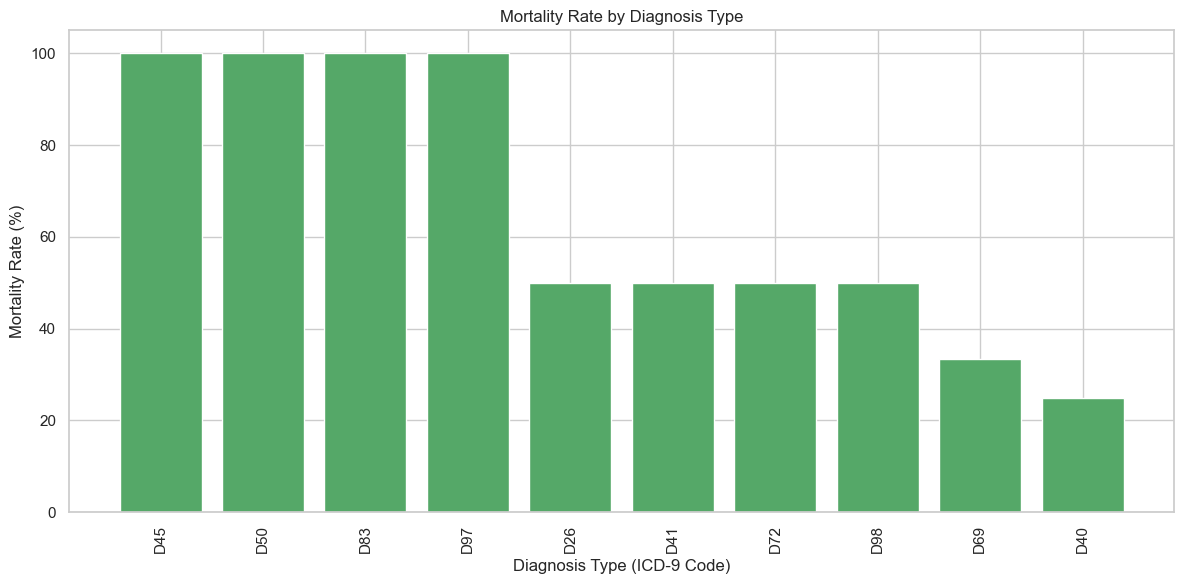

In [69]:
# Visualize Mortality Rate by Diagnosis Type using a bar chart
plt.figure(figsize=(12, 6))
plt.bar(diagnosis_mortality['icd9_code'], diagnosis_mortality['mortality_rate'], color='g')
plt.xlabel('Diagnosis Type (ICD-9 Code)')
plt.ylabel('Mortality Rate (%)')
plt.title('Mortality Rate by Diagnosis Type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Question 5: Age of Patients with Common Diagnoses
### Using the diagnostic codes from Question 3, calculate the average age of patients for each of the top 3 common diagnosis codes. Visualize this information using a bar chart.

In [70]:
# Age column is missing in Dataset.

# Question 6: Drug Prescription Trends
### Identify the top 5 most prescribed drug codes across all patients. Provide the drug codes along with their descriptions and the total number of times they were prescribed. Visualize this information using a horizontal bar chart.

In [71]:
# Calculate the top 5 most prescribed drug codes
top_prescribed_drugs = drug_data['drg_code'].value_counts().head(5)
top_prescribed_drugs

124    4
197    2
181    2
177    2
119    2
Name: drg_code, dtype: int64

In [72]:
# Top drug_ with their discription
top_drugs_data = drug_data[drug_data['drg_code'].isin(top_prescribed_drugs.index)]
top_drugs_data

,row_id,subject_id,hadm_id,drg_type,drg_code,description,drg_severity,drg_mortality
2,3,3,1054,Type A,181,Drug 3,Medium,Medium
3,4,73,1911,Type A,177,Drug 4,High,Low
4,5,8,1011,Type A,119,Drug 5,High,Medium
5,6,97,1656,Type A,181,Drug 6,High,High
7,8,41,1907,Type A,124,Drug 8,Low,Medium
9,10,13,1979,Type B,124,Drug 10,Medium,Low
23,24,44,1363,Type B,124,Drug 24,High,Medium
25,26,3,1632,Type B,197,Drug 26,Low,Low
28,29,2,1083,Type B,197,Drug 29,High,Low
30,31,44,1405,Type B,124,Drug 31,Low,Low


In [73]:
# Group by drug code and description to get the total count
grouped_drugs = top_drugs_data.groupby(['drg_code', 'description']).size().reset_index(name='prescription_count')
grouped_drugs

,drg_code,description,prescription_count
0,119,Drug 43,1
1,119,Drug 5,1
2,124,Drug 10,1
3,124,Drug 24,1
4,124,Drug 31,1
5,124,Drug 8,1
6,177,Drug 4,1
7,177,Drug 42,1
8,181,Drug 3,1
9,181,Drug 6,1


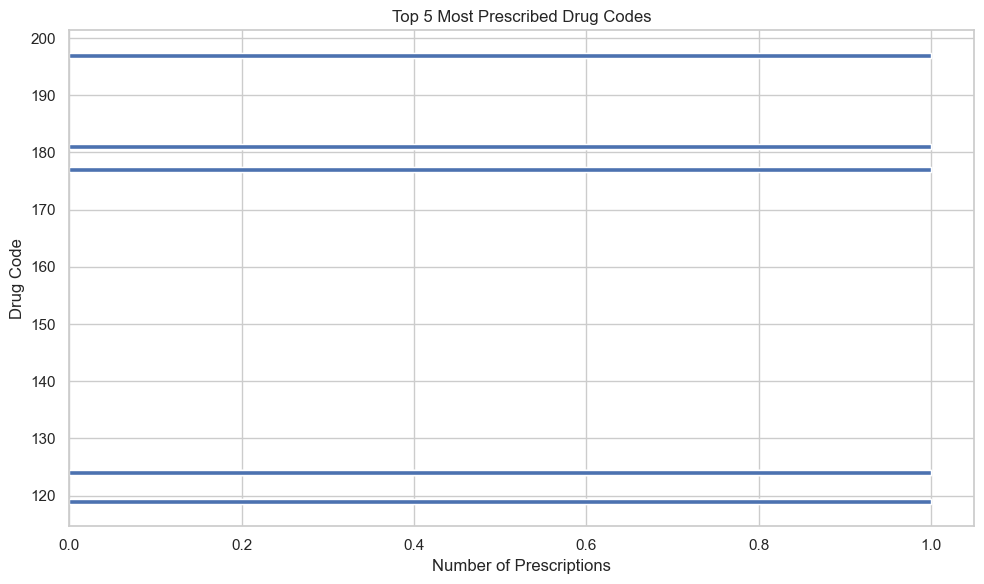

In [74]:
# Visualize Top 5 Most Prescribed Drug Codes using a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(grouped_drugs['drg_code'], grouped_drugs['prescription_count'])
plt.xlabel('Number of Prescriptions')
plt.ylabel('Drug Code')
plt.title('Top 5 Most Prescribed Drug Codes')
plt.tight_layout()
plt.show()

## Question 7: Gender Disparity in Critical Diagnoses
### Analyze the gender distribution among patients with critical diagnoses (diagnosis codes associated with high severity). Calculate the percentage of male and female patients among these critical cases. Visualize this information using a stacked bar chart.

In [75]:
# Identify diagnosis codes associated with high severity
high_severity_diagnoses = ['D81', 'D66', 'D80']  # Example critical diagnosis codes

# Filter diagnostic_code DataFrame for critical diagnoses
critical_diagnoses = diagnostic_data[diagnostic_data['icd9_code'].isin(high_severity_diagnoses)]

# Merge with patient_data to get gender information
critical_diagnoses_gender = critical_diagnoses.merge(patient_data[['subject_id', 'gender']], on='subject_id', how='inner')

# Calculate gender distribution
gender_distribution = critical_diagnoses_gender['gender'].value_counts(normalize=True)
gender_distribution

F    0.5625
M    0.4375
Name: gender, dtype: float64

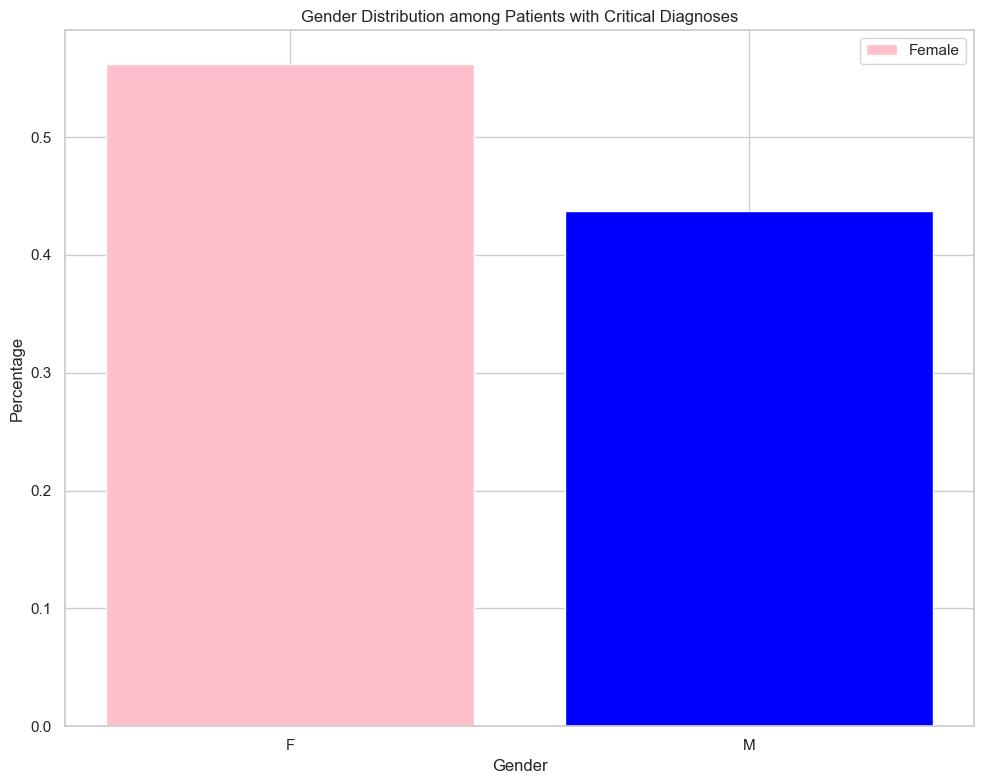

In [80]:
# Creating a stacked bar chart
plt.figure(figsize=(10, 8))
colors = ['pink', 'blue']
plt.bar(gender_distribution.index, gender_distribution.values, color=colors)
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Gender Distribution among Patients with Critical Diagnoses')
plt.legend(['Female','Male'])
plt.tight_layout()
plt.show()

# Conclusion

The comprehensive analysis of hospital patient data offers valuable insights into patient demographics, drug prescriptions, diagnoses, and mortality rates. These insights can inform healthcare decision-making, resource allocation, and intervention strategies, ultimately enhancing patient care and outcomes. Incorporating additional data elements, such as age information, could further enrich the analysis and provide deeper insights into patient characteristics and healthcare dynamics.
